In [1]:
import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.layers.core import Dense, Activation, Dropout

from keras.layers import Input

from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

from keras.utils import np_utils
 
from sklearn.cross_validation import train_test_split, cross_val_score

from sklearn.model_selection import KFold, train_test_split, cross_val_score

from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

import matplotlib.pyplot as plt

from mlxtend.evaluate import confusion_matrix

import io

import os

from keras import regularizers

import time

from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau

from keras.models import Model, load_model

/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#chargement des donnees 

df = pd.read_csv('/home/kodzo.apedo/Bureau/Visu/Nouvelle_Base/10_drift_odom.csv')

In [3]:
a = len(df)

In [4]:
a

324437

In [5]:
ds = df.values

In [6]:
RANDOM_SEED = 42 #used to help randomly select the data points
TEST_PCT = 0.10 

In [7]:
X = ds[:,0:32].astype(float)
Y = ds[:,32]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = TEST_PCT, random_state = RANDOM_SEED)

In [9]:
Y

array([0., 0., 0., ..., 9., 9., 9.])

In [10]:
#Encodons la classe "Classe"

encoder = LabelEncoder()
encoder.fit(Y)
encoder_Y = encoder.transform(Y)

In [11]:
# Redefinissons nos classe

dummy_y = np_utils.to_categorical(encoder_Y)

In [12]:
Yd = dummy_y

In [13]:
X_train, X_test, Yd_train, Yd_test = train_test_split(X, Yd, test_size = TEST_PCT, random_state = RANDOM_SEED)

In [14]:
nb_class = 10 # Nombre de classe

nb_epoch = 1000

batch_size = 1000

#Couche d'entrée

input_dim = X_train.shape[1] #numbre de colonne, 

encoding_dim = 500 # Dimension d'encodage

hidden_dim = encoding_dim - 200 #i.e. 7

hidden_dim2 = hidden_dim - 200

hidden_dim3 = hidden_dim2 - 30

learning_rate = 1e-7

In [15]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation='tanh', 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation='relu')(encoder)
encoder = Dense(input_dim, activation='relu')(encoder)

In [16]:

autoencoder = Model(inputs=input_layer, outputs=encoder)

autoencoder.summary()

autoencoder.compile(metrics=['accuracy'],
                    loss='mse',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="10_drift_odom_ENCOD_W_V.h5",
                               save_best_only=True,
                               verbose=0)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test), callbacks = [cp]).history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               16500     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                9632      
Total params: 176,432
Trainable params: 176,432
Non-trainable params: 0
_________________________________________________________________
Train on 291993 samples, validate on 32444 samples
Epoch 1/1000
291993/291993 [==============================] - 9s 31us/step - loss: 1.1815 - acc: 0.5250 - val_loss: 0.1864 - val_acc: 0.5988
Epoch 2/1000
291993/291993 [==============================] - 11s 38us/step 

Epoch 52/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1766 - acc: 0.6376 - val_loss: 0.1561 - val_acc: 0.6697
Epoch 53/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1582 - acc: 0.6697 - val_loss: 0.1541 - val_acc: 0.6744
Epoch 54/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1658 - acc: 0.6380 - val_loss: 0.1609 - val_acc: 0.6788
Epoch 55/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1703 - acc: 0.6277 - val_loss: 0.1599 - val_acc: 0.6417
Epoch 56/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1761 - acc: 0.6364 - val_loss: 0.1585 - val_acc: 0.5874
Epoch 57/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1644 - acc: 0.6597 - val_loss: 0.1547 - val_acc: 0.6800
Epoch 58/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1574 - acc: 0.6778 - val_loss: 0.1582 - val_acc: 0.6273

291993/291993 [==============================] - 10s 33us/step - loss: 0.1613 - acc: 0.6840 - val_loss: 0.1517 - val_acc: 0.6975
Epoch 110/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1921 - acc: 0.6793 - val_loss: 0.1571 - val_acc: 0.6943
Epoch 111/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1559 - acc: 0.6977 - val_loss: 0.1570 - val_acc: 0.7011
Epoch 112/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1605 - acc: 0.6901 - val_loss: 0.1538 - val_acc: 0.6938
Epoch 113/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1558 - acc: 0.6913 - val_loss: 0.1561 - val_acc: 0.6875
Epoch 114/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1564 - acc: 0.6918 - val_loss: 0.1514 - val_acc: 0.7053
Epoch 115/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1569 - acc: 0.6797 - val_loss: 0.1626 - val_acc: 0.6429
Epoch 1

Epoch 166/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1664 - acc: 0.6740 - val_loss: 0.1530 - val_acc: 0.6631
Epoch 167/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1601 - acc: 0.6766 - val_loss: 0.1785 - val_acc: 0.6150
Epoch 168/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1619 - acc: 0.6745 - val_loss: 0.1678 - val_acc: 0.6137
Epoch 169/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1639 - acc: 0.6711 - val_loss: 0.1542 - val_acc: 0.6765
Epoch 170/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1563 - acc: 0.6874 - val_loss: 0.2205 - val_acc: 0.6305
Epoch 171/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1722 - acc: 0.6693 - val_loss: 0.1511 - val_acc: 0.6914
Epoch 172/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1554 - acc: 0.6900 - val_loss: 0.1603 - val_acc:

Epoch 223/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1581 - acc: 0.6755 - val_loss: 0.1533 - val_acc: 0.6833
Epoch 224/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1578 - acc: 0.6800 - val_loss: 0.1658 - val_acc: 0.5833
Epoch 225/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1567 - acc: 0.6731 - val_loss: 0.1518 - val_acc: 0.6573
Epoch 226/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1600 - acc: 0.6676 - val_loss: 0.1529 - val_acc: 0.6879
Epoch 227/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1659 - acc: 0.6568 - val_loss: 0.1522 - val_acc: 0.6547
Epoch 228/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1619 - acc: 0.6707 - val_loss: 0.1514 - val_acc: 0.6767
Epoch 229/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1594 - acc: 0.6737 - val_loss: 0.1763 - val_acc:

Epoch 280/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1624 - acc: 0.6811 - val_loss: 0.1558 - val_acc: 0.6763
Epoch 281/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1548 - acc: 0.6902 - val_loss: 0.1515 - val_acc: 0.7128
Epoch 282/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1541 - acc: 0.6869 - val_loss: 0.1510 - val_acc: 0.6856
Epoch 283/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1811 - acc: 0.6631 - val_loss: 0.1596 - val_acc: 0.6470
Epoch 284/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1635 - acc: 0.6731 - val_loss: 0.1562 - val_acc: 0.6809
Epoch 285/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1564 - acc: 0.6837 - val_loss: 0.1551 - val_acc: 0.6941
Epoch 286/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1655 - acc: 0.6699 - val_loss: 0.1662 - val_acc:

Epoch 337/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1549 - acc: 0.6869 - val_loss: 0.1498 - val_acc: 0.7062
Epoch 338/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1557 - acc: 0.6984 - val_loss: 0.2416 - val_acc: 0.6693
Epoch 339/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1691 - acc: 0.6779 - val_loss: 0.1507 - val_acc: 0.7083
Epoch 340/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1621 - acc: 0.6840 - val_loss: 0.1514 - val_acc: 0.7094
Epoch 341/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1640 - acc: 0.6926 - val_loss: 0.1792 - val_acc: 0.6653
Epoch 342/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1640 - acc: 0.6862 - val_loss: 0.1550 - val_acc: 0.7170
Epoch 343/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1574 - acc: 0.6992 - val_loss: 0.1518 - val_acc:

Epoch 394/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1623 - acc: 0.7188 - val_loss: 0.1607 - val_acc: 0.6913
Epoch 395/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1605 - acc: 0.7236 - val_loss: 0.1484 - val_acc: 0.7449
Epoch 396/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1527 - acc: 0.7333 - val_loss: 0.1484 - val_acc: 0.7499
Epoch 397/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1515 - acc: 0.7355 - val_loss: 0.1509 - val_acc: 0.7333
Epoch 398/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1638 - acc: 0.7117 - val_loss: 0.1705 - val_acc: 0.6564
Epoch 399/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1555 - acc: 0.7311 - val_loss: 0.1483 - val_acc: 0.7545
Epoch 400/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1581 - acc: 0.7265 - val_loss: 0.1505 - val_acc:

Epoch 451/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1576 - acc: 0.8173 - val_loss: 0.1549 - val_acc: 0.7443
Epoch 452/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1580 - acc: 0.8003 - val_loss: 0.2518 - val_acc: 0.7573
Epoch 453/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1656 - acc: 0.8142 - val_loss: 0.1495 - val_acc: 0.8294
Epoch 454/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1531 - acc: 0.8321 - val_loss: 0.1578 - val_acc: 0.8268
Epoch 455/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1587 - acc: 0.8335 - val_loss: 0.1946 - val_acc: 0.7984
Epoch 456/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1638 - acc: 0.8283 - val_loss: 0.1478 - val_acc: 0.8406
Epoch 457/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1573 - acc: 0.8343 - val_loss: 0.1552 - val_acc:

Epoch 508/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1640 - acc: 0.8199 - val_loss: 0.1477 - val_acc: 0.8384
Epoch 509/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1499 - acc: 0.8442 - val_loss: 0.1486 - val_acc: 0.8402
Epoch 510/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1541 - acc: 0.8241 - val_loss: 0.1489 - val_acc: 0.8484
Epoch 511/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1513 - acc: 0.8365 - val_loss: 0.1515 - val_acc: 0.8048
Epoch 512/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1611 - acc: 0.8134 - val_loss: 0.1486 - val_acc: 0.8531
Epoch 513/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1548 - acc: 0.8184 - val_loss: 0.1520 - val_acc: 0.8192
Epoch 514/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1617 - acc: 0.8018 - val_loss: 0.1490 - val_acc:

Epoch 565/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1684 - acc: 0.8140 - val_loss: 0.1500 - val_acc: 0.8377
Epoch 566/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1558 - acc: 0.8379 - val_loss: 0.1532 - val_acc: 0.8483
Epoch 567/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1575 - acc: 0.8340 - val_loss: 0.1483 - val_acc: 0.8208
Epoch 568/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1532 - acc: 0.8392 - val_loss: 0.1475 - val_acc: 0.8391
Epoch 569/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1551 - acc: 0.8373 - val_loss: 0.1475 - val_acc: 0.8487
Epoch 570/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1574 - acc: 0.8293 - val_loss: 0.2030 - val_acc: 0.8373
Epoch 571/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1611 - acc: 0.8168 - val_loss: 0.1483 - val_acc:

Epoch 622/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1566 - acc: 0.8252 - val_loss: 0.1482 - val_acc: 0.8465
Epoch 623/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1701 - acc: 0.8037 - val_loss: 0.1498 - val_acc: 0.8374
Epoch 624/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1535 - acc: 0.8317 - val_loss: 0.1491 - val_acc: 0.8094
Epoch 625/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1593 - acc: 0.8148 - val_loss: 0.1529 - val_acc: 0.7985
Epoch 626/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1630 - acc: 0.7966 - val_loss: 0.1492 - val_acc: 0.8242
Epoch 627/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1525 - acc: 0.8293 - val_loss: 0.1496 - val_acc: 0.8371
Epoch 628/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1529 - acc: 0.8216 - val_loss: 0.1485 - val_acc:

Epoch 679/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1559 - acc: 0.8281 - val_loss: 0.2050 - val_acc: 0.7982
Epoch 680/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1957 - acc: 0.7799 - val_loss: 0.1492 - val_acc: 0.8358
Epoch 681/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1511 - acc: 0.8349 - val_loss: 0.1484 - val_acc: 0.8408
Epoch 682/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1544 - acc: 0.8265 - val_loss: 0.1902 - val_acc: 0.8248
Epoch 683/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1521 - acc: 0.8334 - val_loss: 0.1556 - val_acc: 0.8027
Epoch 684/1000
291993/291993 [==============================] - 10s 35us/step - loss: 0.1777 - acc: 0.8046 - val_loss: 0.1492 - val_acc: 0.8121
Epoch 685/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1508 - acc: 0.8303 - val_loss: 0.1495 - val_acc:

Epoch 736/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1530 - acc: 0.8127 - val_loss: 0.1517 - val_acc: 0.7973
Epoch 737/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1637 - acc: 0.8128 - val_loss: 0.1788 - val_acc: 0.8027
Epoch 738/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1580 - acc: 0.8148 - val_loss: 0.1491 - val_acc: 0.8329
Epoch 739/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1521 - acc: 0.8302 - val_loss: 0.1486 - val_acc: 0.8370
Epoch 740/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1572 - acc: 0.8235 - val_loss: 0.1495 - val_acc: 0.8253
Epoch 741/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1620 - acc: 0.8193 - val_loss: 0.1685 - val_acc: 0.7895
Epoch 742/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1578 - acc: 0.8186 - val_loss: 0.2236 - val_acc:

291993/291993 [==============================] - 10s 34us/step - loss: 0.1553 - acc: 0.8261 - val_loss: 0.1676 - val_acc: 0.7933
Epoch 793/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1695 - acc: 0.8055 - val_loss: 0.1573 - val_acc: 0.7008
Epoch 794/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1549 - acc: 0.8033 - val_loss: 0.1480 - val_acc: 0.8301
Epoch 795/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1496 - acc: 0.8373 - val_loss: 0.1492 - val_acc: 0.8410
Epoch 796/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1569 - acc: 0.8232 - val_loss: 0.1523 - val_acc: 0.8037
Epoch 797/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1581 - acc: 0.8162 - val_loss: 0.1469 - val_acc: 0.8352
Epoch 798/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1565 - acc: 0.8233 - val_loss: 0.1513 - val_acc: 0.7822
Epoch 7

Epoch 849/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1786 - acc: 0.7734 - val_loss: 0.1519 - val_acc: 0.8153
Epoch 850/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1627 - acc: 0.8099 - val_loss: 0.1821 - val_acc: 0.7940
Epoch 851/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1620 - acc: 0.8100 - val_loss: 0.1487 - val_acc: 0.8316
Epoch 852/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1567 - acc: 0.8133 - val_loss: 0.1505 - val_acc: 0.8480
Epoch 853/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1529 - acc: 0.8184 - val_loss: 0.1473 - val_acc: 0.8331
Epoch 854/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1599 - acc: 0.7950 - val_loss: 0.1473 - val_acc: 0.8619
Epoch 855/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1615 - acc: 0.8032 - val_loss: 0.1542 - val_acc:

Epoch 906/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1608 - acc: 0.7904 - val_loss: 0.1504 - val_acc: 0.7496
Epoch 907/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1612 - acc: 0.7989 - val_loss: 0.2230 - val_acc: 0.6730
Epoch 908/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1816 - acc: 0.7277 - val_loss: 0.1544 - val_acc: 0.7698
Epoch 909/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1663 - acc: 0.7678 - val_loss: 0.1511 - val_acc: 0.8099
Epoch 910/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1659 - acc: 0.7856 - val_loss: 0.1739 - val_acc: 0.7911
Epoch 911/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1539 - acc: 0.8167 - val_loss: 0.1502 - val_acc: 0.8110
Epoch 912/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1616 - acc: 0.7916 - val_loss: 0.1485 - val_acc:

Epoch 963/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1562 - acc: 0.8046 - val_loss: 0.1522 - val_acc: 0.8015
Epoch 964/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1582 - acc: 0.8031 - val_loss: 0.1488 - val_acc: 0.8278
Epoch 965/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1578 - acc: 0.8038 - val_loss: 0.1508 - val_acc: 0.8100
Epoch 966/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1588 - acc: 0.8016 - val_loss: 0.1479 - val_acc: 0.8375
Epoch 967/1000
291993/291993 [==============================] - 10s 34us/step - loss: 0.1773 - acc: 0.7917 - val_loss: 0.1517 - val_acc: 0.8194
Epoch 968/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1563 - acc: 0.8169 - val_loss: 0.1539 - val_acc: 0.7900
Epoch 969/1000
291993/291993 [==============================] - 10s 33us/step - loss: 0.1544 - acc: 0.8107 - val_loss: 0.1637 - val_acc:

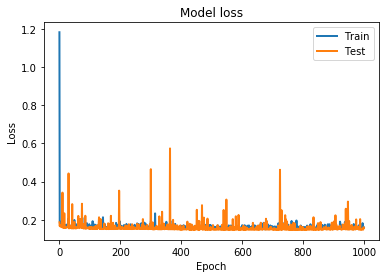

In [17]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

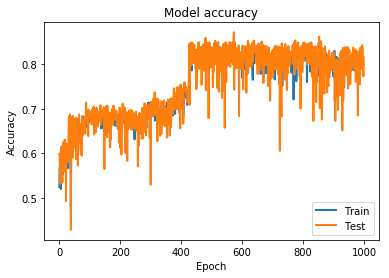

In [18]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [19]:

model = Sequential()

model.add(autoencoder)

model.add(Dense(500, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(300, activation ='relu'))
model.add(Dense(200, activation ='relu'))
#model.add(Dropout(0.2))
model.add(Dense(100, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(nb_class, activation ='sigmoid'))

model.compile(metrics=['accuracy'], loss = 'mse', 
              optimizer='adam')

model.summary()

checkpointer = ModelCheckpoint(filepath='10_odom_drift.h5', 
                               verbose=2, save_best_only=True)

history = model.fit(X_train, Yd_train,
             validation_data=(X_test, Yd_test),
             epochs= nb_epoch,
             batch_size=batch_size,
             shuffle=True,
             verbose=2, callbacks=[checkpointer]).history

score, acc = model.evaluate(X_test, y = Yd_test, 
               batch_size = batch_size, 
               verbose = 1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 32)                176432    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               16500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
__________

 - 20s - loss: 0.0224 - acc: 0.8359 - val_loss: 0.0243 - val_acc: 0.8197

Epoch 00044: val_loss did not improve from 0.02187
Epoch 45/1000
 - 20s - loss: 0.0221 - acc: 0.8387 - val_loss: 0.0213 - val_acc: 0.8436

Epoch 00045: val_loss improved from 0.02187 to 0.02132, saving model to 10_odom_drift.h5
Epoch 46/1000
 - 20s - loss: 0.0221 - acc: 0.8380 - val_loss: 0.0224 - val_acc: 0.8369

Epoch 00046: val_loss did not improve from 0.02132
Epoch 47/1000
 - 20s - loss: 0.0218 - acc: 0.8411 - val_loss: 0.0221 - val_acc: 0.8377

Epoch 00047: val_loss did not improve from 0.02132
Epoch 48/1000
 - 20s - loss: 0.0218 - acc: 0.8404 - val_loss: 0.0222 - val_acc: 0.8369

Epoch 00048: val_loss did not improve from 0.02132
Epoch 49/1000
 - 20s - loss: 0.0214 - acc: 0.8440 - val_loss: 0.0218 - val_acc: 0.8395

Epoch 00049: val_loss did not improve from 0.02132
Epoch 50/1000
 - 20s - loss: 0.0212 - acc: 0.8458 - val_loss: 0.0210 - val_acc: 0.8457

Epoch 00050: val_loss improved from 0.02132 to 0.02104

 - 12s - loss: 0.0167 - acc: 0.8819 - val_loss: 0.0201 - val_acc: 0.8567

Epoch 00099: val_loss did not improve from 0.01673
Epoch 100/1000
 - 12s - loss: 0.0168 - acc: 0.8813 - val_loss: 0.0173 - val_acc: 0.8775

Epoch 00100: val_loss did not improve from 0.01673
Epoch 101/1000
 - 12s - loss: 0.0166 - acc: 0.8829 - val_loss: 0.0170 - val_acc: 0.8790

Epoch 00101: val_loss did not improve from 0.01673
Epoch 102/1000
 - 12s - loss: 0.0168 - acc: 0.8821 - val_loss: 0.0172 - val_acc: 0.8781

Epoch 00102: val_loss did not improve from 0.01673
Epoch 103/1000
 - 12s - loss: 0.0166 - acc: 0.8824 - val_loss: 0.0167 - val_acc: 0.8816

Epoch 00103: val_loss did not improve from 0.01673
Epoch 104/1000
 - 12s - loss: 0.0175 - acc: 0.8799 - val_loss: 0.0172 - val_acc: 0.8792

Epoch 00104: val_loss did not improve from 0.01673
Epoch 105/1000
 - 12s - loss: 0.0169 - acc: 0.8806 - val_loss: 0.0178 - val_acc: 0.8741

Epoch 00105: val_loss did not improve from 0.01673
Epoch 106/1000
 - 12s - loss: 0.016

 - 12s - loss: 0.0147 - acc: 0.8970 - val_loss: 0.0157 - val_acc: 0.8893

Epoch 00156: val_loss did not improve from 0.01526
Epoch 157/1000
 - 12s - loss: 0.0149 - acc: 0.8960 - val_loss: 0.0156 - val_acc: 0.8899

Epoch 00157: val_loss did not improve from 0.01526
Epoch 158/1000
 - 12s - loss: 0.0148 - acc: 0.8968 - val_loss: 0.0154 - val_acc: 0.8915

Epoch 00158: val_loss did not improve from 0.01526
Epoch 159/1000
 - 12s - loss: 0.0145 - acc: 0.8987 - val_loss: 0.0157 - val_acc: 0.8886

Epoch 00159: val_loss did not improve from 0.01526
Epoch 160/1000
 - 12s - loss: 0.0148 - acc: 0.8971 - val_loss: 0.0188 - val_acc: 0.8679

Epoch 00160: val_loss did not improve from 0.01526
Epoch 161/1000
 - 12s - loss: 0.0150 - acc: 0.8955 - val_loss: 0.0151 - val_acc: 0.8943

Epoch 00161: val_loss improved from 0.01526 to 0.01507, saving model to 10_odom_drift.h5
Epoch 162/1000
 - 12s - loss: 0.0147 - acc: 0.8968 - val_loss: 0.0159 - val_acc: 0.8880

Epoch 00162: val_loss did not improve from 0.015


Epoch 00213: val_loss did not improve from 0.01377
Epoch 214/1000
 - 12s - loss: 0.0133 - acc: 0.9069 - val_loss: 0.0148 - val_acc: 0.8969

Epoch 00214: val_loss did not improve from 0.01377
Epoch 215/1000
 - 12s - loss: 0.0136 - acc: 0.9049 - val_loss: 0.0145 - val_acc: 0.8988

Epoch 00215: val_loss did not improve from 0.01377
Epoch 216/1000
 - 12s - loss: 0.0132 - acc: 0.9077 - val_loss: 0.0155 - val_acc: 0.8927

Epoch 00216: val_loss did not improve from 0.01377
Epoch 217/1000
 - 12s - loss: 0.0136 - acc: 0.9049 - val_loss: 0.0143 - val_acc: 0.9008

Epoch 00217: val_loss did not improve from 0.01377
Epoch 218/1000
 - 12s - loss: 0.0134 - acc: 0.9063 - val_loss: 0.0151 - val_acc: 0.8996

Epoch 00218: val_loss did not improve from 0.01377
Epoch 219/1000
 - 12s - loss: 0.0134 - acc: 0.9067 - val_loss: 0.0145 - val_acc: 0.8985

Epoch 00219: val_loss did not improve from 0.01377
Epoch 220/1000
 - 12s - loss: 0.0133 - acc: 0.9074 - val_loss: 0.0145 - val_acc: 0.8981

Epoch 00220: val_lo

 - 12s - loss: 0.0121 - acc: 0.9149 - val_loss: 0.0132 - val_acc: 0.9079

Epoch 00271: val_loss improved from 0.01326 to 0.01322, saving model to 10_odom_drift.h5
Epoch 272/1000
 - 12s - loss: 0.0124 - acc: 0.9129 - val_loss: 0.0141 - val_acc: 0.9021

Epoch 00272: val_loss did not improve from 0.01322
Epoch 273/1000
 - 12s - loss: 0.0124 - acc: 0.9136 - val_loss: 0.0140 - val_acc: 0.9019

Epoch 00273: val_loss did not improve from 0.01322
Epoch 274/1000
 - 12s - loss: 0.0126 - acc: 0.9122 - val_loss: 0.0143 - val_acc: 0.8994

Epoch 00274: val_loss did not improve from 0.01322
Epoch 275/1000
 - 12s - loss: 0.0122 - acc: 0.9145 - val_loss: 0.0170 - val_acc: 0.8823

Epoch 00275: val_loss did not improve from 0.01322
Epoch 276/1000
 - 12s - loss: 0.0129 - acc: 0.9102 - val_loss: 0.0139 - val_acc: 0.9022

Epoch 00276: val_loss did not improve from 0.01322
Epoch 277/1000
 - 12s - loss: 0.0125 - acc: 0.9132 - val_loss: 0.0142 - val_acc: 0.9006

Epoch 00277: val_loss did not improve from 0.013


Epoch 00328: val_loss improved from 0.01278 to 0.01277, saving model to 10_odom_drift.h5
Epoch 329/1000
 - 12s - loss: 0.0120 - acc: 0.9173 - val_loss: 0.0131 - val_acc: 0.9097

Epoch 00329: val_loss did not improve from 0.01277
Epoch 330/1000
 - 12s - loss: 0.0119 - acc: 0.9175 - val_loss: 0.0134 - val_acc: 0.9064

Epoch 00330: val_loss did not improve from 0.01277
Epoch 331/1000
 - 12s - loss: 0.0136 - acc: 0.9115 - val_loss: 0.0158 - val_acc: 0.8983

Epoch 00331: val_loss did not improve from 0.01277
Epoch 332/1000
 - 12s - loss: 0.0134 - acc: 0.9127 - val_loss: 0.0140 - val_acc: 0.9063

Epoch 00332: val_loss did not improve from 0.01277
Epoch 333/1000
 - 12s - loss: 0.0120 - acc: 0.9185 - val_loss: 0.0130 - val_acc: 0.9110

Epoch 00333: val_loss did not improve from 0.01277
Epoch 334/1000
 - 12s - loss: 0.0116 - acc: 0.9195 - val_loss: 0.0140 - val_acc: 0.9047

Epoch 00334: val_loss did not improve from 0.01277
Epoch 335/1000
 - 12s - loss: 0.0118 - acc: 0.9180 - val_loss: 0.0132 


Epoch 00385: val_loss did not improve from 0.01228
Epoch 386/1000
 - 12s - loss: 0.0121 - acc: 0.9155 - val_loss: 0.0149 - val_acc: 0.8981

Epoch 00386: val_loss did not improve from 0.01228
Epoch 387/1000
 - 12s - loss: 0.0118 - acc: 0.9175 - val_loss: 0.0128 - val_acc: 0.9115

Epoch 00387: val_loss did not improve from 0.01228
Epoch 388/1000
 - 12s - loss: 0.0116 - acc: 0.9196 - val_loss: 0.0133 - val_acc: 0.9092

Epoch 00388: val_loss did not improve from 0.01228
Epoch 389/1000
 - 12s - loss: 0.0116 - acc: 0.9199 - val_loss: 0.0136 - val_acc: 0.9068

Epoch 00389: val_loss did not improve from 0.01228
Epoch 390/1000
 - 12s - loss: 0.0118 - acc: 0.9179 - val_loss: 0.0127 - val_acc: 0.9122

Epoch 00390: val_loss did not improve from 0.01228
Epoch 391/1000
 - 12s - loss: 0.0115 - acc: 0.9194 - val_loss: 0.0129 - val_acc: 0.9105

Epoch 00391: val_loss did not improve from 0.01228
Epoch 392/1000
 - 12s - loss: 0.0115 - acc: 0.9199 - val_loss: 0.0128 - val_acc: 0.9116

Epoch 00392: val_lo

 - 12s - loss: 0.0115 - acc: 0.9216 - val_loss: 0.0132 - val_acc: 0.9090

Epoch 00444: val_loss did not improve from 0.01222
Epoch 445/1000
 - 12s - loss: 0.0117 - acc: 0.9199 - val_loss: 0.0158 - val_acc: 0.8914

Epoch 00445: val_loss did not improve from 0.01222
Epoch 446/1000
 - 12s - loss: 0.0110 - acc: 0.9231 - val_loss: 0.0132 - val_acc: 0.9095

Epoch 00446: val_loss did not improve from 0.01222
Epoch 447/1000
 - 12s - loss: 0.0110 - acc: 0.9230 - val_loss: 0.0124 - val_acc: 0.9145

Epoch 00447: val_loss did not improve from 0.01222
Epoch 448/1000
 - 12s - loss: 0.0109 - acc: 0.9240 - val_loss: 0.0127 - val_acc: 0.9124

Epoch 00448: val_loss did not improve from 0.01222
Epoch 449/1000
 - 12s - loss: 0.0115 - acc: 0.9202 - val_loss: 0.0136 - val_acc: 0.9059

Epoch 00449: val_loss did not improve from 0.01222
Epoch 450/1000
 - 12s - loss: 0.0110 - acc: 0.9231 - val_loss: 0.0131 - val_acc: 0.9098

Epoch 00450: val_loss did not improve from 0.01222
Epoch 451/1000
 - 12s - loss: 0.011


Epoch 00502: val_loss did not improve from 0.01211
Epoch 503/1000
 - 12s - loss: 0.0113 - acc: 0.9217 - val_loss: 0.0129 - val_acc: 0.9098

Epoch 00503: val_loss did not improve from 0.01211
Epoch 504/1000
 - 12s - loss: 0.0110 - acc: 0.9234 - val_loss: 0.0124 - val_acc: 0.9136

Epoch 00504: val_loss did not improve from 0.01211
Epoch 505/1000
 - 12s - loss: 0.0126 - acc: 0.9207 - val_loss: 0.0144 - val_acc: 0.9099

Epoch 00505: val_loss did not improve from 0.01211
Epoch 506/1000
 - 12s - loss: 0.0120 - acc: 0.9226 - val_loss: 0.0146 - val_acc: 0.9022

Epoch 00506: val_loss did not improve from 0.01211
Epoch 507/1000
 - 12s - loss: 0.0113 - acc: 0.9235 - val_loss: 0.0124 - val_acc: 0.9149

Epoch 00507: val_loss did not improve from 0.01211
Epoch 508/1000
 - 12s - loss: 0.0108 - acc: 0.9256 - val_loss: 0.0128 - val_acc: 0.9120

Epoch 00508: val_loss did not improve from 0.01211
Epoch 509/1000
 - 12s - loss: 0.0106 - acc: 0.9254 - val_loss: 0.0130 - val_acc: 0.9096

Epoch 00509: val_lo

 - 12s - loss: 0.0119 - acc: 0.9196 - val_loss: 0.0132 - val_acc: 0.9098

Epoch 00561: val_loss did not improve from 0.01207
Epoch 562/1000
 - 12s - loss: 0.0116 - acc: 0.9207 - val_loss: 0.0125 - val_acc: 0.9143

Epoch 00562: val_loss did not improve from 0.01207
Epoch 563/1000
 - 12s - loss: 0.0109 - acc: 0.9245 - val_loss: 0.0129 - val_acc: 0.9105

Epoch 00563: val_loss did not improve from 0.01207
Epoch 564/1000
 - 12s - loss: 0.0107 - acc: 0.9257 - val_loss: 0.0130 - val_acc: 0.9117

Epoch 00564: val_loss did not improve from 0.01207
Epoch 565/1000
 - 12s - loss: 0.0114 - acc: 0.9221 - val_loss: 0.0130 - val_acc: 0.9106

Epoch 00565: val_loss did not improve from 0.01207
Epoch 566/1000
 - 12s - loss: 0.0108 - acc: 0.9253 - val_loss: 0.0123 - val_acc: 0.9146

Epoch 00566: val_loss did not improve from 0.01207
Epoch 567/1000
 - 12s - loss: 0.0103 - acc: 0.9273 - val_loss: 0.0125 - val_acc: 0.9121

Epoch 00567: val_loss did not improve from 0.01207
Epoch 568/1000
 - 12s - loss: 0.013


Epoch 00619: val_loss did not improve from 0.01207
Epoch 620/1000
 - 12s - loss: 0.0114 - acc: 0.9229 - val_loss: 0.0135 - val_acc: 0.9113

Epoch 00620: val_loss did not improve from 0.01207
Epoch 621/1000
 - 12s - loss: 0.0107 - acc: 0.9264 - val_loss: 0.0126 - val_acc: 0.9147

Epoch 00621: val_loss did not improve from 0.01207
Epoch 622/1000
 - 12s - loss: 0.0103 - acc: 0.9278 - val_loss: 0.0123 - val_acc: 0.9148

Epoch 00622: val_loss did not improve from 0.01207
Epoch 623/1000
 - 12s - loss: 0.0105 - acc: 0.9260 - val_loss: 0.0128 - val_acc: 0.9117

Epoch 00623: val_loss did not improve from 0.01207
Epoch 624/1000
 - 12s - loss: 0.0108 - acc: 0.9251 - val_loss: 0.0133 - val_acc: 0.9095

Epoch 00624: val_loss did not improve from 0.01207
Epoch 625/1000
 - 12s - loss: 0.0116 - acc: 0.9228 - val_loss: 0.0142 - val_acc: 0.9135

Epoch 00625: val_loss did not improve from 0.01207
Epoch 626/1000
 - 12s - loss: 0.0118 - acc: 0.9240 - val_loss: 0.0134 - val_acc: 0.9119

Epoch 00626: val_lo


Epoch 00678: val_loss did not improve from 0.01207
Epoch 679/1000
 - 12s - loss: 0.0107 - acc: 0.9266 - val_loss: 0.0135 - val_acc: 0.9118

Epoch 00679: val_loss did not improve from 0.01207
Epoch 680/1000
 - 12s - loss: 0.0108 - acc: 0.9270 - val_loss: 0.0130 - val_acc: 0.9109

Epoch 00680: val_loss did not improve from 0.01207
Epoch 681/1000
 - 12s - loss: 0.0110 - acc: 0.9253 - val_loss: 0.0124 - val_acc: 0.9152

Epoch 00681: val_loss did not improve from 0.01207
Epoch 682/1000
 - 12s - loss: 0.0128 - acc: 0.9154 - val_loss: 0.0133 - val_acc: 0.9114

Epoch 00682: val_loss did not improve from 0.01207
Epoch 683/1000
 - 12s - loss: 0.0114 - acc: 0.9219 - val_loss: 0.0128 - val_acc: 0.9115

Epoch 00683: val_loss did not improve from 0.01207
Epoch 684/1000
 - 12s - loss: 0.0105 - acc: 0.9265 - val_loss: 0.0131 - val_acc: 0.9098

Epoch 00684: val_loss did not improve from 0.01207
Epoch 685/1000
 - 12s - loss: 0.0105 - acc: 0.9269 - val_loss: 0.0125 - val_acc: 0.9132

Epoch 00685: val_lo

 - 12s - loss: 0.0115 - acc: 0.9234 - val_loss: 0.0133 - val_acc: 0.9106

Epoch 00737: val_loss did not improve from 0.01204
Epoch 738/1000
 - 12s - loss: 0.0104 - acc: 0.9286 - val_loss: 0.0128 - val_acc: 0.9134

Epoch 00738: val_loss did not improve from 0.01204
Epoch 739/1000
 - 12s - loss: 0.0102 - acc: 0.9286 - val_loss: 0.0129 - val_acc: 0.9116

Epoch 00739: val_loss did not improve from 0.01204
Epoch 740/1000
 - 12s - loss: 0.0101 - acc: 0.9292 - val_loss: 0.0130 - val_acc: 0.9118

Epoch 00740: val_loss did not improve from 0.01204
Epoch 741/1000
 - 12s - loss: 0.0105 - acc: 0.9275 - val_loss: 0.0137 - val_acc: 0.9067

Epoch 00741: val_loss did not improve from 0.01204
Epoch 742/1000
 - 12s - loss: 0.0110 - acc: 0.9242 - val_loss: 0.0125 - val_acc: 0.9126

Epoch 00742: val_loss did not improve from 0.01204
Epoch 743/1000
 - 12s - loss: 0.0104 - acc: 0.9268 - val_loss: 0.0131 - val_acc: 0.9105

Epoch 00743: val_loss did not improve from 0.01204
Epoch 744/1000
 - 12s - loss: 0.010


Epoch 00795: val_loss did not improve from 0.01201
Epoch 796/1000
 - 12s - loss: 0.0115 - acc: 0.9236 - val_loss: 0.0141 - val_acc: 0.9084

Epoch 00796: val_loss did not improve from 0.01201
Epoch 797/1000
 - 12s - loss: 0.0109 - acc: 0.9271 - val_loss: 0.0127 - val_acc: 0.9150

Epoch 00797: val_loss did not improve from 0.01201
Epoch 798/1000
 - 12s - loss: 0.0107 - acc: 0.9289 - val_loss: 0.0138 - val_acc: 0.9081

Epoch 00798: val_loss did not improve from 0.01201
Epoch 799/1000
 - 12s - loss: 0.0123 - acc: 0.9194 - val_loss: 0.0130 - val_acc: 0.9121

Epoch 00799: val_loss did not improve from 0.01201
Epoch 800/1000
 - 12s - loss: 0.0109 - acc: 0.9269 - val_loss: 0.0127 - val_acc: 0.9140

Epoch 00800: val_loss did not improve from 0.01201
Epoch 801/1000
 - 12s - loss: 0.0104 - acc: 0.9284 - val_loss: 0.0176 - val_acc: 0.8881

Epoch 00801: val_loss did not improve from 0.01201
Epoch 802/1000
 - 12s - loss: 0.0108 - acc: 0.9247 - val_loss: 0.0147 - val_acc: 0.9018

Epoch 00802: val_lo


Epoch 00854: val_loss did not improve from 0.01201
Epoch 855/1000
 - 12s - loss: 0.0102 - acc: 0.9292 - val_loss: 0.0127 - val_acc: 0.9131

Epoch 00855: val_loss did not improve from 0.01201
Epoch 856/1000
 - 12s - loss: 0.0101 - acc: 0.9296 - val_loss: 0.0126 - val_acc: 0.9126

Epoch 00856: val_loss did not improve from 0.01201
Epoch 857/1000
 - 12s - loss: 0.0109 - acc: 0.9253 - val_loss: 0.0120 - val_acc: 0.9168

Epoch 00857: val_loss improved from 0.01201 to 0.01199, saving model to 10_odom_drift.h5
Epoch 858/1000
 - 12s - loss: 0.0098 - acc: 0.9308 - val_loss: 0.0127 - val_acc: 0.9131

Epoch 00858: val_loss did not improve from 0.01199
Epoch 859/1000
 - 12s - loss: 0.0100 - acc: 0.9292 - val_loss: 0.0124 - val_acc: 0.9151

Epoch 00859: val_loss did not improve from 0.01199
Epoch 860/1000
 - 12s - loss: 0.0097 - acc: 0.9313 - val_loss: 0.0126 - val_acc: 0.9130

Epoch 00860: val_loss did not improve from 0.01199
Epoch 861/1000
 - 12s - loss: 0.0108 - acc: 0.9258 - val_loss: 0.0134 


Epoch 00912: val_loss did not improve from 0.01195
Epoch 913/1000
 - 12s - loss: 0.0162 - acc: 0.8975 - val_loss: 0.0182 - val_acc: 0.8955

Epoch 00913: val_loss did not improve from 0.01195
Epoch 914/1000
 - 12s - loss: 0.0117 - acc: 0.9258 - val_loss: 0.0128 - val_acc: 0.9156

Epoch 00914: val_loss did not improve from 0.01195
Epoch 915/1000
 - 12s - loss: 0.0104 - acc: 0.9293 - val_loss: 0.0126 - val_acc: 0.9145

Epoch 00915: val_loss did not improve from 0.01195
Epoch 916/1000
 - 12s - loss: 0.0192 - acc: 0.8781 - val_loss: 0.0128 - val_acc: 0.9134

Epoch 00916: val_loss did not improve from 0.01195
Epoch 917/1000
 - 12s - loss: 0.0136 - acc: 0.9077 - val_loss: 0.0352 - val_acc: 0.7543

Epoch 00917: val_loss did not improve from 0.01195
Epoch 918/1000
 - 12s - loss: 0.0155 - acc: 0.8939 - val_loss: 0.0124 - val_acc: 0.9147

Epoch 00918: val_loss did not improve from 0.01195
Epoch 919/1000
 - 12s - loss: 0.0102 - acc: 0.9288 - val_loss: 0.0123 - val_acc: 0.9151

Epoch 00919: val_lo


Epoch 00971: val_loss did not improve from 0.01195
Epoch 972/1000
 - 12s - loss: 0.0136 - acc: 0.9167 - val_loss: 0.0221 - val_acc: 0.8717

Epoch 00972: val_loss did not improve from 0.01195
Epoch 973/1000
 - 12s - loss: 0.0162 - acc: 0.9028 - val_loss: 0.0150 - val_acc: 0.9044

Epoch 00973: val_loss did not improve from 0.01195
Epoch 974/1000
 - 12s - loss: 0.0128 - acc: 0.9230 - val_loss: 0.0135 - val_acc: 0.9155

Epoch 00974: val_loss did not improve from 0.01195
Epoch 975/1000
 - 12s - loss: 0.0110 - acc: 0.9297 - val_loss: 0.0137 - val_acc: 0.9108

Epoch 00975: val_loss did not improve from 0.01195
Epoch 976/1000
 - 12s - loss: 0.0110 - acc: 0.9303 - val_loss: 0.0133 - val_acc: 0.9154

Epoch 00976: val_loss did not improve from 0.01195
Epoch 977/1000
 - 12s - loss: 0.0133 - acc: 0.9175 - val_loss: 0.0174 - val_acc: 0.8962

Epoch 00977: val_loss did not improve from 0.01195
Epoch 978/1000
 - 12s - loss: 0.0140 - acc: 0.9154 - val_loss: 0.0181 - val_acc: 0.8976

Epoch 00978: val_lo

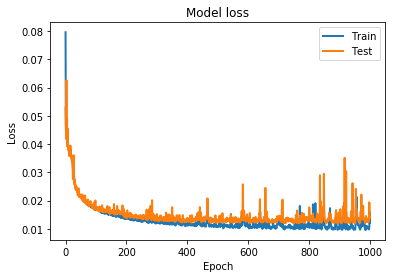

In [20]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

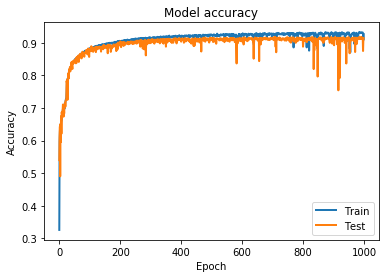

In [21]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [22]:
preds = model.predict(X_test)
preds[preds>=0.5]=1
preds[preds<0.5]=0
class_labels = np.argmax(preds, axis=1)

In [23]:
cm = confusion_matrix(y_target=Y_test, y_predicted=class_labels, binary=False)

In [24]:
cm

array([[3210,    0,    0,    0,    0,  136,  112,    8,    0,   28],
       [  10, 3092,    0,   56,    1,    0,    0,    0,    0,    0],
       [   4,    0, 3450,    0,    3,    0,    0,    1,    0,    0],
       [1542,    9,    1, 1694,    0,    0,    1,    0,    0,    0],
       [   2,    0,    9,    0, 3018,    0,    1,    0,    0,    0],
       [ 211,    0,    0,    0,    0, 3207,  170,    6,    0,   30],
       [ 179,    0,    0,    0,    0,  169, 2858,    6,    0,    6],
       [  25,    0,    0,    0,    0,   18,   11, 3019,    1,    2],
       [   2,    0,    0,    0,    0,    0,    0,    0, 3114,    0],
       [  65,    0,    0,    0,    0,   27,   21,    6,    0, 2903]])